### Entraînement sur Google Colab avec GPU

Dans cette section, nous exploitons la puissance de calcul gratuite de Google Colab pour entraîner nos modèles de classification d'images. L'utilisation du GPU permet d'accélérer significativement le processus d'apprentissage, particulièrement pour les réseaux de neurones convolutifs et les modèles YOLO.


In [ ]:
# ================== PRÉPARATION DU DATASET ===================
# Extraction du fichier ZIP contenant les images du dataset Wang
# Préparation des données pour l'entraînement du modèle convolutif



import zipfile
import os

#
zip_path = "/content/dataset.zip"


extract_dir = "/content/dataset"

# Créer le dossier s’il n’existe pas
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Fichier décompressé avec succès dans :", extract_dir)


✅ Fichier décompressé avec succès dans : /content/dataset


<h3> Attribution des labels et division du dataset </h3>

Dans cette section, nous procédons à l'étiquetage automatique des images selon leur position dans le dataset Wang. Les 100 premières images correspondent à la classe 0, les 100 suivantes à la classe 1, et ainsi de suite pour les 10 classes. Ensuite, nous divisons le dataset en ensembles d'entraînement, de validation et de test pour alimenter notre réseau de neurones convolutif (CNN) composé de couches de convolution et de couches denses.

**Étapes :**
- **Labeling automatique** : Attribution des classes selon l'index des images (0-99 → classe 0, 100-199 → classe 1, etc.)
- **Division stratifiée** : Répartition train/validation/test (60%/20%/20%)
- **Architecture CNN** : Modèle avec couches convolutives, batch normalization, et couches denses

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt


# 1 Dossier contenant toutes les images
base_dir = "/content/Wang/Wang"

# 2 Liste des classes
classes = ["Jungle","Plage","Monuments","Bus","Dinosaures",
           "Elephants","Fleurs","Chevaux","Montagne","Plats"]

# 3 Lire toutes les images dans l'ordre
images = []
labels = []

# Liste triée pour garder l'ordre correct
all_images = sorted(os.listdir(base_dir))

for i, img_name in enumerate(all_images):
    img_path = os.path.join(base_dir, img_name)
    img = cv2.imread(img_path)
    if img is None:
        continue

    img = cv2.resize(img, (256,256))
    images.append(img)

    # 4 Déterminer la classe selon l'indice
    class_index = i // 100   # chaque 100 images -> nouvelle classe
    labels.append(class_index)

# 5 Conversion en tableau numpy
images = np.array(images)
labels = np.array(labels)



# Split des données
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Formes des données:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



#definition de modele CNN

model=keras.models.Sequential([
                                  keras.layers.Conv2D(64,3,padding="same",activation="relu",input_shape=[256,256,3]),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.MaxPool2D(2),
                                  keras.layers.Conv2D(64,3,padding="same",activation="relu"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.MaxPool2D(2),

                                  keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.MaxPool2D(2),



                                  # Couches entièrement connectées
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(128,activation="relu"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dropout(0.25),
                                  keras.layers.Dense(64,activation="relu"),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dropout(0.5),
                                  keras.layers.Dense(10,activation="softmax")

                                ])

early=keras.callbacks.EarlyStopping(patience=5)


          #configuration de modéle

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


          #Entrainement le modéle

history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20,callbacks=[early])







Formes des données:
X_train: (600, 256, 256, 3), y_train: (600,)
X_val: (200, 256, 256, 3), y_val: (200,)
X_test: (200, 256, 256, 3), y_test: (200,)
Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2175 - loss: 2.8685 - val_accuracy: 0.0900 - val_loss: 44.9750
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.3776 - loss: 1.9009 - val_accuracy: 0.0900 - val_loss: 19.7154
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.4681 - loss: 1.6314 - val_accuracy: 0.1000 - val_loss: 14.3329
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.4399 - loss: 1.5854 - val_accuracy: 0.2600 - val_loss: 3.8019
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.5935 - loss: 1.2517 - val_accuracy: 0.3150 - val_loss: 2.6038
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.5974 - loss: 1.2575 - val_accuracy: 0.2950 - val_loss: 2.5472
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.6202 - loss: 1.0

<h3>  Évaluation du modèle et analyse des performances </h3>

Dans cette section, nous évaluons les performances de notre modèle CNN entraîné en effectuant des prédictions sur l'ensemble de test. Nous visualisons ensuite les résultats à travers une matrice de confusion pour analyser la qualité de classification par classe et identifier les erreurs potentielles du modèle.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


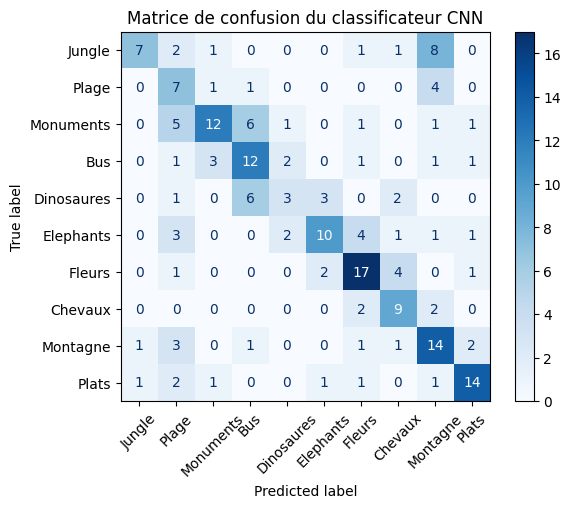

In [11]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Classes prédites
y_pred_classes = np.argmax(y_pred, axis=1)

# Classes réelles (non one-hot)
y_true = y_test

# Liste des classes
classes = ["Jungle","Plage","Monuments","Bus","Dinosaures",
           "Elephants","Fleurs","Chevaux","Montagne","Plats"]

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matrice de confusion du classificateur CNN")
plt.show()


In [13]:


#  4. Calcul de l'accuracy globale
acc = accuracy_score(y_true, y_pred_classes)
print(f"✅ Accuracy sur le jeu de test : {acc*100:.2f}%")


✅ Accuracy sur le jeu de test : 52.50%


FINETUNING en utilisant yolo pour la detection

In [14]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00


In [19]:
!rm -r /content/dataset

<h3> Préparation du dataset pour YOLO Classification </h3>

Cette section décrit la préparation du dataset Wang pour l'entraînement d'un modèle YOLO en mode classification. L'objectif est d'organiser les images dans la structure attendue par les outils de classification (un dossier par classe pour chaque split), d'assurer une répartition équilibrée train/val/test et d'appliquer les prétraitements nécessaires.

Objectifs
- Restructurer les fichiers en dossiers par classe pour train / val / test.
- Diviser les images de chaque classe de manière reproductible (ex. 70% / 20% / 10%).
- Vérifier l'équilibre des classes et la qualité des images (réduction des corruptions).
- Appliquer éventuellement redimensionnement et augmentation avant l'entraînement.

Étapes principales
1. Extraire l'archive du dataset.
2. Assigner les labels (ex. indices 0–99 → classe 0, 100–199 → classe 1, …).
3. Mélanger les fichiers de chaque classe de façon deterministe (seed fixe).
4. Fractionner chaque classe en train / val / test selon les ratios choisis.
5. Copier les fichiers dans la structure suivante et vérifier les totaux par split/classe.
6. (Optionnel) Redimensionner, normaliser et sauvegarder versions augmentées si besoin.

Structure attendue (exemple)
dataset/
├── train/
│   ├── Jungle/
│   ├── Plage/
│   ├── Monuments/
│   └── ...
├── val/
│   ├── Jungle/
│   ├── Plage/
│   └── ...
└── test/
    ├── Jungle/
    ├── Plage/
    └── ...


In [ ]:
#

import os
import shutil
import random
from pathlib import Path

def split_wang_classification():
    """Divise le dataset Wang en format YOLO Classification"""
    
    # Configuration
    source_dir = "Wang"
    output_dir = "dataset"
    train_ratio = 0.7
    val_ratio = 0.2
    test_ratio = 0.1
    
    # Classes Wang (10 classes, 100 images chacune)
    classes = ["Jungle", "Plage", "Monuments", "Bus", "Dinosaures",
               "Elephants", "Fleurs", "Chevaux", "Montagne", "Plats"]
    
    print(f" Division du dataset Wang pour CLASSIFICATION...")
    print(f" Source: {source_dir}")
    print(f" Destination: {output_dir}")

    # Créer les dossiers pour chaque classe dans chaque split
    for split in ['train', 'val', 'test']:
        for class_name in classes:
            os.makedirs(f"{output_dir}/{split}/{class_name}", exist_ok=True)
    
    # Statistiques
    total_stats = {'train': 0, 'val': 0, 'test': 0}
    
    # Traiter chaque classe
    random.seed(42)
    
    for class_id in range(10):  # 10 classes
        class_name = classes[class_id]
        
        # Images de cette classe (100 images: class_id*100 à (class_id+1)*100-1)
        start_idx = class_id * 100
        end_idx = (class_id + 1) * 100
        
        class_images = []
        for i in range(start_idx, end_idx):
            img_file = f"{source_dir}/{i}.jpg"
            if os.path.exists(img_file):
                class_images.append(img_file)
        
        print(f" Classe {class_id} ({class_name}): {len(class_images)} images trouvées")
        
        # Mélanger et diviser
        random.shuffle(class_images)
        
        n_train = int(len(class_images) * train_ratio)
        n_val = int(len(class_images) * val_ratio)
        n_test = len(class_images) - n_train - n_val
        
        train_imgs = class_images[:n_train]
        val_imgs = class_images[n_train:n_train + n_val]
        test_imgs = class_images[n_train + n_val:]
        
        # Copier les fichiers dans les bons dossiers de classe
        for split, imgs, count in [('train', train_imgs, n_train), 
                                   ('val', val_imgs, n_val), 
                                   ('test', test_imgs, n_test)]:
            for img_path in imgs:
                img_name = os.path.basename(img_path)
                dest_path = f"{output_dir}/{split}/{class_name}/{img_name}"
                shutil.copy2(img_path, dest_path)
            
            total_stats[split] += count
        
        print(f"    Train: {n_train} images")
        print(f"   Val: {n_val} images")
        print(f"    Test: {n_test} images")
    
    # Pour YOLO Classification, pas besoin de data.yaml
    # La structure des dossiers suffit
    print(f" Pour YOLO Classification: utilisez directement le dossier '{output_dir}'")
    
    print(f"\n Dataset YOLO Classification créé dans '{output_dir}/'")
    print(f" Statistiques totales:")
    print(f"    Train: {total_stats['train']} images")
    print(f"    Val: {total_stats['val']} images")
    print(f"   Test: {total_stats['test']} images")
    print(f" Pas de fichier data.yaml nécessaire pour la classification")
    
    # Vérifier la structure créée
    print(f"\n Structure créée:")
    for split in ['train', 'val', 'test']:
        print(f" {split}/")
        for class_name in classes:
            class_dir = Path(f"{output_dir}/{split}/{class_name}")
            if class_dir.exists():
                count = len(list(class_dir.glob("*.jpg")))
                print(f"   ├──{class_name}: {count} images")

if __name__ == "__main__":
    # Créer le dataset de classification
    split_wang_classification()
    
    #
    
    print(f"\n Prochaines étapes pour CLASSIFICATION:")
    print(f"1. Installer YOLO: pip install ultralytics")
    print(f"2. Lancer l'entraînement: python train_yolo_classify.py")
    print(f"3. Ou directement: yolo classify train data=dataset_classify model=yolov8n-cls.pt epochs=100 imgsz=224")

Entrainement de modele (Yolo) en utilisant le model <b>yolov8n-cls.pt</b> avec 30 epochs

In [24]:
!yolo classify train model=yolov8n-cls.pt data=/content/dataset/dataset epochs=30 imgsz=224


Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

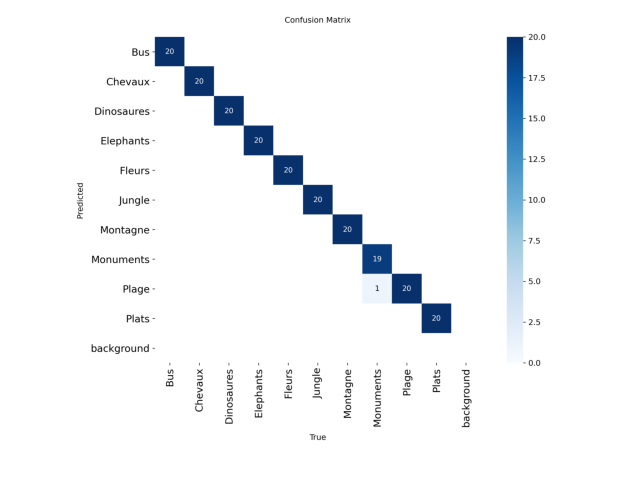

In [27]:
import matplotlib.image as mpimg

# Lire l'image
img = mpimg.imread("/content/runs/classify/train3/confusion_matrix.png")

# Afficher
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')  # enlever les axes
plt.show()

<h3> Analyse des courbes d'apprentissage </h3>

Ce graphique illustre l'évolution des métriques de performance (telles que la perte et la précision) pour les ensembles d'entraînement et de validation au fil des époques. L'analyse de ces courbes est essentielle pour diagnostiquer le comportement du modèle, notamment pour détecter le sur-apprentissage (overfitting) .

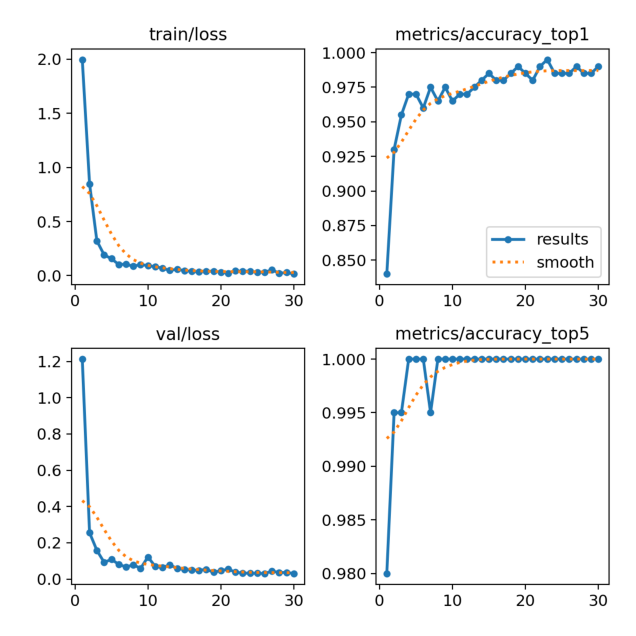

In [28]:
import matplotlib.image as mpimg

# Lire l'image
img = mpimg.imread("/content/runs/classify/train3/results.png")

# Afficher
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')  # enlever les axes
plt.show()